# 라이브러리 임포트 & 데이터 읽어오기 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
path = "D:/LG_Radar"
train = pd.read_csv(path+"/train.csv")
test = pd.read_csv(path+"/test.csv")
submission = pd.read_csv(path+"/sample_submission.csv")

In [3]:
def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(14): # ignore 'ID'
        rmse = mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    print(all_nrmse)
    return score

In [4]:
train

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,TRAIN_39606,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,...,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [5]:
train.columns

Index(['ID', 'X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08',
       'X_09', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17',
       'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26',
       'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35',
       'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44',
       'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53',
       'X_54', 'X_55', 'X_56', 'Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06',
       'Y_07', 'Y_08', 'Y_09', 'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14'],
      dtype='object')

In [7]:
X = train[list(train.columns[1:57])]
y = train[list(train.columns[57:])]
test = test[list(test.columns[1:])]

In [8]:
X.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.0,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,1.0,1.0,16676.913639,130.774557,131.457418,138.587595,127.992420,128.014110,137.884711,128.441119
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,0.0,0.0,8584.427420,5.989845,5.934313,6.469813,5.713153,5.433958,6.552101,5.444245
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,1.0,1.0,3341.830000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,1.0,1.0,13093.930000,126.948571,127.669758,134.475401,124.374525,124.697879,133.744103,125.134713
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,1.0,1.0,15273.330000,130.723378,131.352856,138.525575,128.020010,128.098728,137.900952,128.414501
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,1.0,1.0,17560.180000,134.538998,135.170761,142.702448,131.618662,131.487423,142.073102,131.839764
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,1.0,1.0,114563.630000,162.619458,194.513195,173.438623,152.406630,175.052891,170.155980,155.277538


In [9]:
np.sum(X.isnull())

X_01    0
X_02    0
X_03    0
X_04    0
X_05    0
X_06    0
X_07    0
X_08    0
X_09    0
X_10    0
X_11    0
X_12    0
X_13    0
X_14    0
X_15    0
X_16    0
X_17    0
X_18    0
X_19    0
X_20    0
X_21    0
X_22    0
X_23    0
X_24    0
X_25    0
X_26    0
X_27    0
X_28    0
X_29    0
X_30    0
X_31    0
X_32    0
X_33    0
X_34    0
X_35    0
X_36    0
X_37    0
X_38    0
X_39    0
X_40    0
X_41    0
X_42    0
X_43    0
X_44    0
X_45    0
X_46    0
X_47    0
X_48    0
X_49    0
X_50    0
X_51    0
X_52    0
X_53    0
X_54    0
X_55    0
X_56    0
dtype: int64

In [10]:
corr_matrix = train.corr()[list(train.columns[57:])].iloc[:56]

<AxesSubplot:>

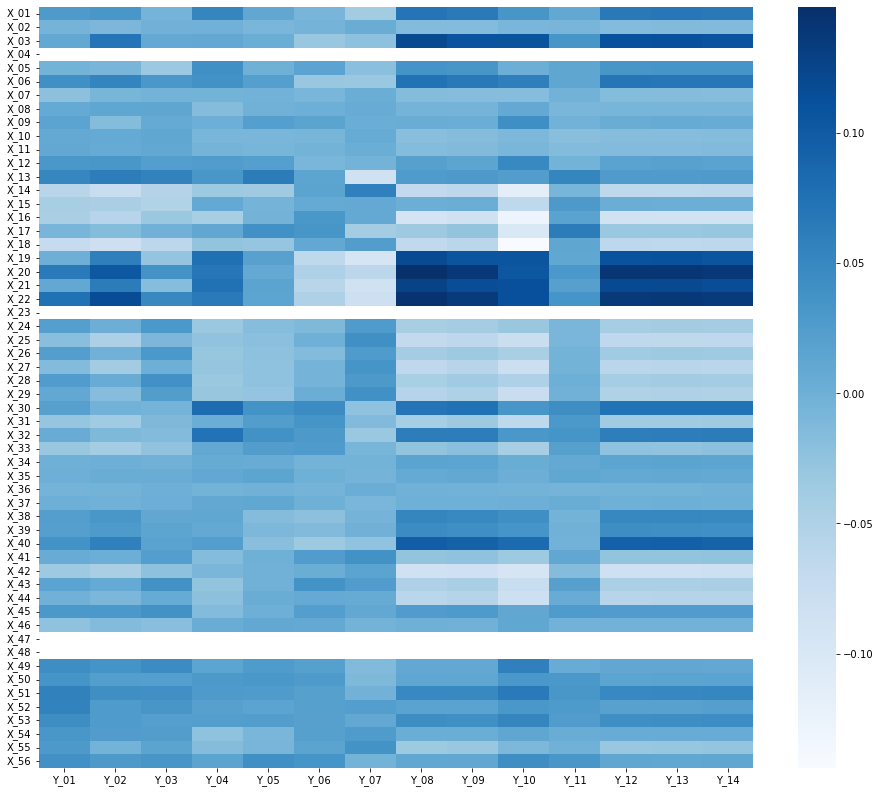

In [11]:
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap=plt.cm.Blues)

In [12]:
pd.DataFrame([0.2594777429390943, 0.3608651752575464, 0.35299554221448104, 0.18707286611813304, 0.07910317604116744, 0.11971384182649097, 0.13004823447152736, 0.024185815130866747, 0.023799344141429164, 0.0394765219333084, 0.03337109441235436, 0.023992849164211377, 0.02396454569120152, 0.02398859789548287], y.columns, ).transpose()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,0.259478,0.360865,0.352996,0.187073,0.079103,0.119714,0.130048,0.024186,0.023799,0.039477,0.033371,0.023993,0.023965,0.023989


도메인 지식이 없는 상태에서 남은 기간 동안14개의 타겟값에 대하여 X각각을 분석하는 것은 힘들다 생각하였음.  
모델 학습시 트리 기반 혹은 신경망 기반 모델을 사용할 것이므로 먼저 랜덤 포레스트의 베이스 모델에서 비용함수를 비교함.  
에러의 편차가 크므로 에러가 큰 타겟값 부터 하나씩 값을 줄여나가는 식으로 데이터 전처리를 진행 예정

# Y_02, Y_03 타겟값 분석

In [13]:
corr_0203 = train.corr()[list(train.columns[58:60])].iloc[:56]

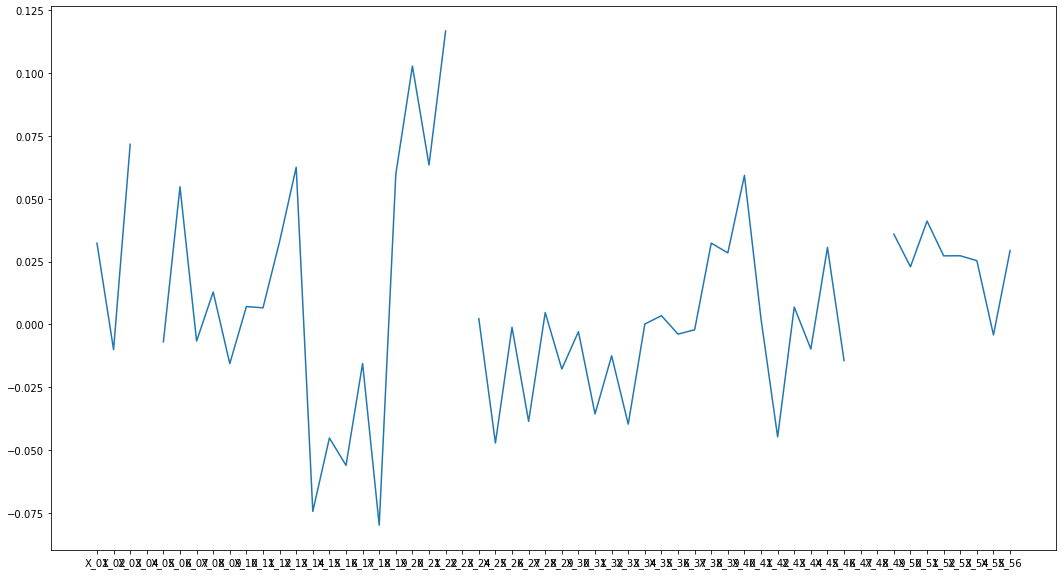

In [66]:
plt.figure(figsize=(18, 10))
plt.plot(corr_0203["Y_02"])

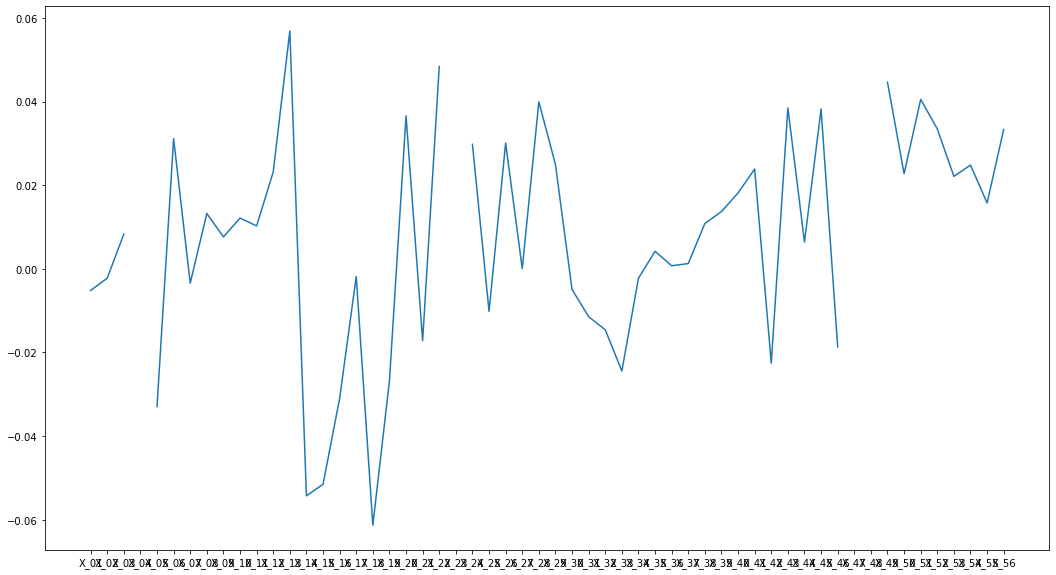

In [67]:
plt.figure(figsize=(18, 10))
plt.plot(corr_0203["Y_03"])

그래프가 끊긴 부분은 상관관계가 NaN값을 반환할때이다.  
https://stackoverflow.com/questions/22655667/dataframe-correlation-produces-nan-although-its-values-are-all-integers  
값의 편차가 너무 작으면 상관관계가 Nan을 반환할 수 있다고 한다.

In [70]:
corr_matrix.isna().sum(axis=1)

X_01     0
X_02     0
X_03     0
X_04    14
X_05     0
X_06     0
X_07     0
X_08     0
X_09     0
X_10     0
X_11     0
X_12     0
X_13     0
X_14     0
X_15     0
X_16     0
X_17     0
X_18     0
X_19     0
X_20     0
X_21     0
X_22     0
X_23    14
X_24     0
X_25     0
X_26     0
X_27     0
X_28     0
X_29     0
X_30     0
X_31     0
X_32     0
X_33     0
X_34     0
X_35     0
X_36     0
X_37     0
X_38     0
X_39     0
X_40     0
X_41     0
X_42     0
X_43     0
X_44     0
X_45     0
X_46     0
X_47    14
X_48    14
X_49     0
X_50     0
X_51     0
X_52     0
X_53     0
X_54     0
X_55     0
X_56     0
dtype: int64

04, 23, 47, 48 컬럼이 Nan값을 반환한다.

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39607 non-null  object 
 1   X_01    39607 non-null  float64
 2   X_02    39607 non-null  float64
 3   X_03    39607 non-null  float64
 4   X_04    39607 non-null  int64  
 5   X_05    39607 non-null  float64
 6   X_06    39607 non-null  float64
 7   X_07    39607 non-null  float64
 8   X_08    39607 non-null  float64
 9   X_09    39607 non-null  float64
 10  X_10    39607 non-null  float64
 11  X_11    39607 non-null  float64
 12  X_12    39607 non-null  float64
 13  X_13    39607 non-null  float64
 14  X_14    39607 non-null  float64
 15  X_15    39607 non-null  float64
 16  X_16    39607 non-null  float64
 17  X_17    39607 non-null  float64
 18  X_18    39607 non-null  float64
 19  X_19    39607 non-null  float64
 20  X_20    39607 non-null  float64
 21  X_21    39607 non-null  float64
 22

In [86]:
train[["X_04", "X_23", "X_46", "X_47","X_48"]]

,X_04,X_23,X_46,X_47,X_48
0,1,1,1463,1,1
1,1,1,1463,1,1
2,1,1,1468,1,1
3,1,1,1469,1,1
4,1,1,1469,1,1
...,...,...,...,...,...
39602,1,1,1469,1,1
39603,1,1,1458,1,1
39604,1,1,1459,1,1
39605,1,1,1469,1,1


4, 23, 47, 48만 카테고리컬한 특성임을 확인할 수 있다.  
이들은 결측치가 없으므로 상관관계를 분석하여도 전처리가 어려우니 일단 스킵한다.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train, y_test = y_train["Y_02"], y_test["Y_02"]

In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
mean_squared_error(y_test, model.predict(X_test))

0.1434201123488285

In [17]:
pd.DataFrame(X.columns,model.feature_importances_).sort_index(ascending=False)

,0
0.041121,X_49
0.037878,X_07
0.037418,X_09
0.035906,X_22
0.033144,X_50
0.033121,X_52
0.033052,X_56
0.032633,X_51
0.032561,X_08
0.032072,X_05


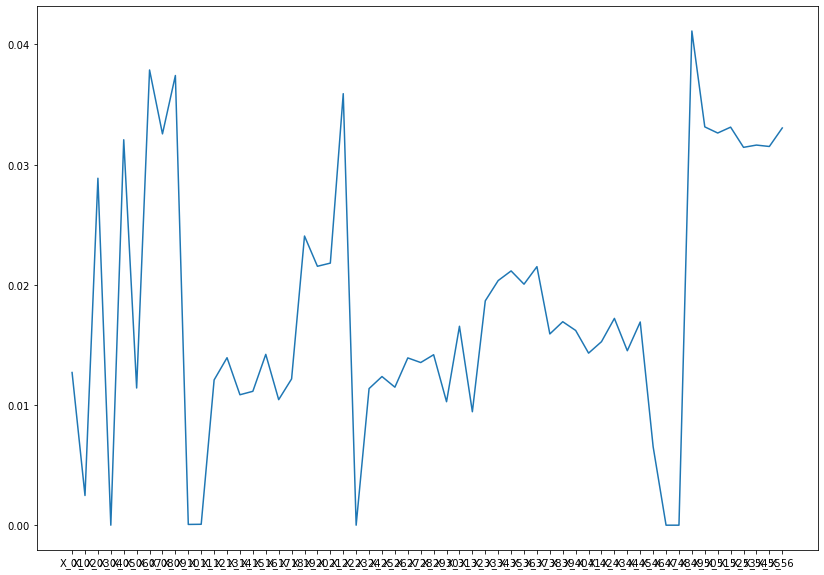

In [18]:
plt.figure(figsize=(14, 10))
plt.plot(X.columns,model.feature_importances_)

49의 중요도가 제일 높으며 이후 특성 역시 중요도가 높다.  
트리 기반 알고리즘은 한 번에 두개 이상의 특성을 고려하지 못하는데 50~56은 연관성이 있는 특성이라 판단, 이를 전부 더한 특성을 추가하고 재학습 후 에러를 확인해본다.

In [21]:
X

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,0.0,...,1,1,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [31]:
X_drop = X.drop(X.columns[49:], axis=1)
X_drop["rf_sum"] = np.sum(X[list(X.columns[49:])], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y)
y_train, y_test = y_train["Y_02"], y_test["Y_02"]

In [33]:
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

0.14621532322786304

In [35]:
pd.DataFrame(X_drop.columns,model.feature_importances_).sort_index(ascending=False)

,0
0.049387,X_49
0.045197,X_09
0.044910,X_07
0.044827,rf_sum
0.041193,X_08
0.039950,X_22
0.039379,X_05
0.037238,X_03
0.029227,X_19
0.027614,X_20


In [104]:
X["rf_sum"] = np.sum(X[list(X.columns[49:])], axis=1)

C:\Users\hjhhi\AppData\Local\Temp\ipykernel_16732\1403865559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["rf_sum"] = np.sum(X[list(X.columns[49:])], axis=1)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train, y_test = y_train["Y_02"], y_test["Y_02"]

In [107]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [108]:
mean_squared_error(y_test, model.predict(X_test))

0.1420852172924157

In [109]:
pd.DataFrame(X.columns,model.feature_importances_).sort_index(ascending=False)

,0
0.040037,X_49
0.038675,X_07
0.035392,X_09
0.034222,X_22
0.032842,X_56
0.032411,X_08
0.031257,X_50
0.031179,X_53
0.030679,X_05
0.030601,X_51


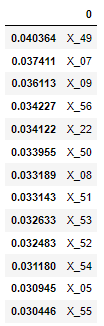 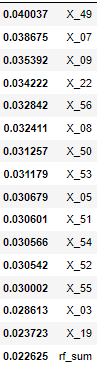

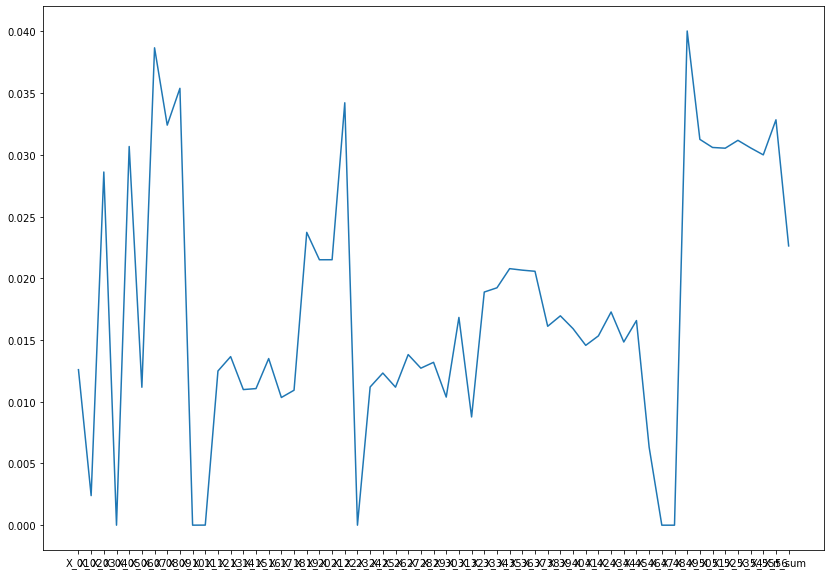

In [110]:
plt.figure(figsize=(14, 10))
plt.plot(X.columns,model.feature_importances_)

rf_sum 특성이 추가 되면서 50번대 특성의 중요도가 조금씩 줄어들었다.  
분명 의미가 있는 특성이지만 50번대 특성과 상관관계가 높아 오히려 모델의 학습을 망치고 있다 판단하였다.

In [167]:
X_train[list(X_train.columns[:50])]

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50
400,69.524,103.320,71.17,1,103.158,69.884,27.27,106.41,184.96,0.0,...,21.16,21.01,21.17,21.13,0.16,1461,1,1,14328.93,140.695844
26311,66.465,103.321,66.07,1,101.945,69.884,28.22,115.83,263.23,0.0,...,21.15,21.12,21.18,21.19,0.07,1469,1,1,16159.73,127.151089
7657,68.504,103.320,67.87,1,103.134,68.864,26.99,112.48,317.45,0.0,...,21.16,21.01,21.24,21.13,0.23,1469,1,1,9183.03,124.046521
3968,69.524,103.320,68.37,1,103.156,69.884,33.99,224.00,263.58,0.0,...,21.20,21.10,21.19,21.19,0.10,1469,1,1,13601.63,121.956830
14077,69.524,103.320,67.67,1,103.133,69.884,29.28,113.51,280.09,0.0,...,21.18,21.02,21.20,21.14,0.18,1469,1,1,20101.53,124.089238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13530,69.524,103.320,69.27,1,101.958,69.884,30.40,127.91,248.53,0.0,...,21.22,21.12,21.23,21.20,0.11,1463,1,1,13552.33,121.974400
10427,68.504,103.320,70.57,1,102.005,68.864,28.20,76.93,223.70,0.0,...,21.12,20.99,21.08,21.10,0.13,1469,1,1,16578.43,132.266423
36499,66.465,103.320,63.87,1,101.920,66.825,27.58,115.50,243.01,0.0,...,21.21,21.09,21.23,21.21,0.14,1469,1,1,10083.13,131.779500
16972,67.485,103.320,69.97,1,101.883,73.963,28.05,115.13,267.46,0.0,...,21.20,21.09,21.22,21.21,0.13,1469,1,1,9545.43,124.563542


In [176]:
X_1 = X_train[list(X_train.columns[:56])]
X_2 = X_train[list(X_train.columns[:50])]
X_2["rf_sum"] = X_train["rf_sum"]
X_test_1 = X_test[list(X_test.columns[:56])]
X_test_2 = X_test[list(X_test.columns[:50])]
X_test_2["rf_sum"] = X_test["rf_sum"]

C:\Users\hjhhi\AppData\Local\Temp\ipykernel_16732\2434400647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2["rf_sum"] = X_train["rf_sum"]
C:\Users\hjhhi\AppData\Local\Temp\ipykernel_16732\2434400647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_2["rf_sum"] = X_test["rf_sum"]


In [171]:
X_1

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
400,69.524,103.320,71.17,1,103.158,69.884,27.27,106.41,184.96,0.0,...,1,1,14328.93,140.695844,129.729176,131.860925,139.111853,131.368183,135.488430,130.399944
26311,66.465,103.321,66.07,1,101.945,69.884,28.22,115.83,263.23,0.0,...,1,1,16159.73,127.151089,124.611363,132.755464,126.351713,122.097233,134.881161,126.273647
7657,68.504,103.320,67.87,1,103.134,68.864,26.99,112.48,317.45,0.0,...,1,1,9183.03,124.046521,130.373844,130.369905,121.030203,126.086056,132.197094,121.382389
3968,69.524,103.320,68.37,1,103.156,69.884,33.99,224.00,263.58,0.0,...,1,1,13601.63,121.956830,137.018322,137.055772,117.436537,121.962894,134.531270,128.031132
14077,69.524,103.320,67.67,1,103.133,69.884,29.28,113.51,280.09,0.0,...,1,1,20101.53,124.089238,132.063984,132.028261,126.411924,129.327488,131.724598,126.743801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13530,69.524,103.320,69.27,1,101.958,69.884,30.40,127.91,248.53,0.0,...,1,1,13552.33,121.974400,131.910778,128.253252,120.513998,132.355358,128.977406,125.732014
10427,68.504,103.320,70.57,1,102.005,68.864,28.20,76.93,223.70,0.0,...,1,1,16578.43,132.266423,141.922352,143.503824,126.701796,130.266079,135.576092,138.626957
36499,66.465,103.320,63.87,1,101.920,66.825,27.58,115.50,243.01,0.0,...,1,1,10083.13,131.779500,130.064068,143.992632,130.010573,128.739750,145.578122,132.939945
16972,67.485,103.320,69.97,1,101.883,73.963,28.05,115.13,267.46,0.0,...,1,1,9545.43,124.563542,140.486935,136.611215,132.159117,124.323543,136.649548,132.571552


In [172]:
X_2

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,rf_sum
400,69.524,103.320,71.17,1,103.158,69.884,27.27,106.41,184.96,0.0,...,21.01,21.17,21.13,0.16,1461,1,1,14328.93,140.695844,938.654355
26311,66.465,103.321,66.07,1,101.945,69.884,28.22,115.83,263.23,0.0,...,21.12,21.18,21.19,0.07,1469,1,1,16159.73,127.151089,894.121670
7657,68.504,103.320,67.87,1,103.134,68.864,26.99,112.48,317.45,0.0,...,21.01,21.24,21.13,0.23,1469,1,1,9183.03,124.046521,885.486012
3968,69.524,103.320,68.37,1,103.156,69.884,33.99,224.00,263.58,0.0,...,21.10,21.19,21.19,0.10,1469,1,1,13601.63,121.956830,897.992757
14077,69.524,103.320,67.67,1,103.133,69.884,29.28,113.51,280.09,0.0,...,21.02,21.20,21.14,0.18,1469,1,1,20101.53,124.089238,902.389294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13530,69.524,103.320,69.27,1,101.958,69.884,30.40,127.91,248.53,0.0,...,21.12,21.23,21.20,0.11,1463,1,1,13552.33,121.974400,889.717206
10427,68.504,103.320,70.57,1,102.005,68.864,28.20,76.93,223.70,0.0,...,20.99,21.08,21.10,0.13,1469,1,1,16578.43,132.266423,948.863523
36499,66.465,103.320,63.87,1,101.920,66.825,27.58,115.50,243.01,0.0,...,21.09,21.23,21.21,0.14,1469,1,1,10083.13,131.779500,943.104590
16972,67.485,103.320,69.97,1,101.883,73.963,28.05,115.13,267.46,0.0,...,21.09,21.22,21.21,0.13,1469,1,1,9545.43,124.563542,927.365452


In [173]:
model_1 = RandomForestRegressor()
model_1.fit(X_1, y_train)
model_2 = RandomForestRegressor()
model_2.fit(X_2, y_train)

RandomForestRegressor()

In [157]:
X_test_2 = np.array(X_test_2).reshape(X_test_2.shape[0],1)

In [177]:
print(mean_squared_error(y_test, model_1.predict(X_test_1)))
print(mean_squared_error(y_test, model_2.predict(X_test_2)))

0.1418457881781559
0.14194011167281356


큰 차이가 없으므로 변수를 합치는 식의 전처리는 진행하지 않는다.

In [189]:
y["Y_02"]

0        1.456
1        1.184
2        0.665
3        1.079
4        0.646
         ...  
39602    1.215
39603    0.606
39604    1.154
39605    0.187
39606    0.348
Name: Y_02, Length: 39607, dtype: float64

In [193]:
y["Y_02"]

0        1.456
1        1.184
2        0.665
3        1.079
4        0.646
         ...  
39602    1.215
39603    0.606
39604    1.154
39605    0.187
39606    0.348
Name: Y_02, Length: 39607, dtype: float64

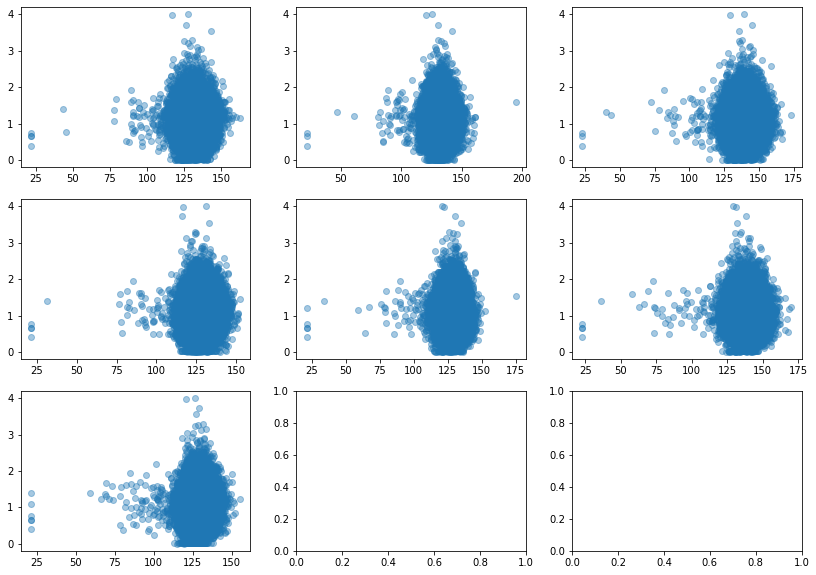

In [203]:
fig, ax = plt.subplots(3, 3, figsize=(14,10))
ax[0][0].scatter(X["X_50"], y["Y_02"], alpha=0.4)
ax[0][1].scatter(X["X_51"], y["Y_02"], alpha=0.4)
ax[0][2].scatter(X["X_52"], y["Y_02"], alpha=0.4)
ax[1][0].scatter(X["X_53"], y["Y_02"], alpha=0.4)
ax[1][1].scatter(X["X_54"], y["Y_02"], alpha=0.4)
ax[1][2].scatter(X["X_55"], y["Y_02"], alpha=0.4)
ax[2][0].scatter(X["X_56"], y["Y_02"], alpha=0.4)

<AxesSubplot:>

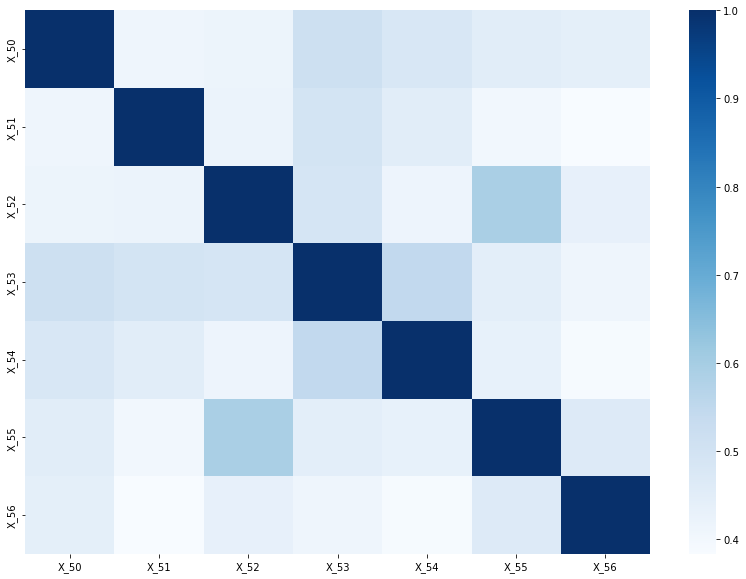

In [211]:
plt.figure(figsize=(14, 10))
sns.heatmap(train.corr()[list(X.columns[49:56])].iloc[49:56], cmap=plt.cm.Blues)

52와 55의 연관성이 특히 높아 보인다.  
그 중 55만 제거하고 다시 학습해보았다.

In [215]:
temp = range(10)

In [221]:
temp[0:3]

range(0, 3)

In [231]:
X_1 = X_train
X_2 = X_train[list(X_train.columns[:54])]
X_2["X_56"] = X_train["X_56"]
X_test_1 = X_test
X_test_2 = X_test[list(X_test.columns[:54])]
X_test_2["X_56"] = X_test["X_56"]

C:\Users\hjhhi\AppData\Local\Temp\ipykernel_16732\3144976502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2["X_56"] = X_train["X_56"]
C:\Users\hjhhi\AppData\Local\Temp\ipykernel_16732\3144976502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_2["X_56"] = X_test["X_56"]


In [236]:
model_1 = RandomForestRegressor()
model_1.fit(X_1, y_train)
model_2 = RandomForestRegressor()
model_2.fit(X_2, y_train)

RandomForestRegressor()

In [238]:
print(mean_squared_error(y_test, model_1.predict(X_test_1)))
print(mean_squared_error(y_test, model_2.predict(X_test_2)))

0.14231933535789737
0.14231509616767318


In [240]:
model_1.feature_importances_[49:]

array([0.03197053, 0.03106248, 0.03105988, 0.03113294, 0.02965674,
       0.02970732, 0.03233506, 0.02169933])

In [241]:
model_2.feature_importances_[49:]

array([0.03428941, 0.03426388, 0.03367602, 0.03350033, 0.03286423,
       0.03559133])

Y_2 특성에 대하여 X_55를 제외할때 성능이 아주 약간 높은 것을 확인하였다.  
전체 데이터에 이를 적용하여 성능을 평가해본다

# 성능 평가

In [249]:
path = "D:/LG_Radar"
train = pd.read_csv(path+"/train.csv")
test = pd.read_csv(path+"/test.csv")
submission = pd.read_csv(path+"/sample_submission.csv")

In [250]:
X = train[list(train.columns[1:57])]
X_without_55 = X.drop("X_55", axis=1)
y = train[list(train.columns[57:])]
test = test[list(test.columns[1:])]

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), random_state=42)
model_1 = RandomForestRegressor()
model_1.fit(X_train, y_train)
lg_nrmse(y_test, model_1.predict(X_test))

[0.25808012375059314, 0.3574506407149291, 0.349883446100442, 0.19902209911362878, 0.07990915107905715, 0.10530830568165286, 0.1295909190421072, 0.02407797506682301, 0.023997516856645095, 0.038472009653297334, 0.03335427145663204, 0.02414682504248528, 0.02401227980525781, 0.024028372014013522]


1.9719984674874107

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_without_55, np.array(y), random_state=42)
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)
lg_nrmse(y_test, model_2.predict(X_test))

C:\Users\hjhhi\anaconda3\envs\python3.9.0\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- X_55

  warnings.warn(message, FutureWarning)


ValueError: X has 55 features, but RandomForestRegressor is expecting 56 features as input.

In [254]:
lg_nrmse(y_test, model_2.predict(X_test))

[0.2582977243856082, 0.35737115944312886, 0.35021521675133743, 0.1991043347993377, 0.07994070385897593, 0.10616525294971303, 0.12963377016601232, 0.02408751339465968, 0.023988754691939312, 0.0385621824939124, 0.03335962784096443, 0.02414231283633892, 0.024001571262534268, 0.02403782126882755]


1.9738710812930447

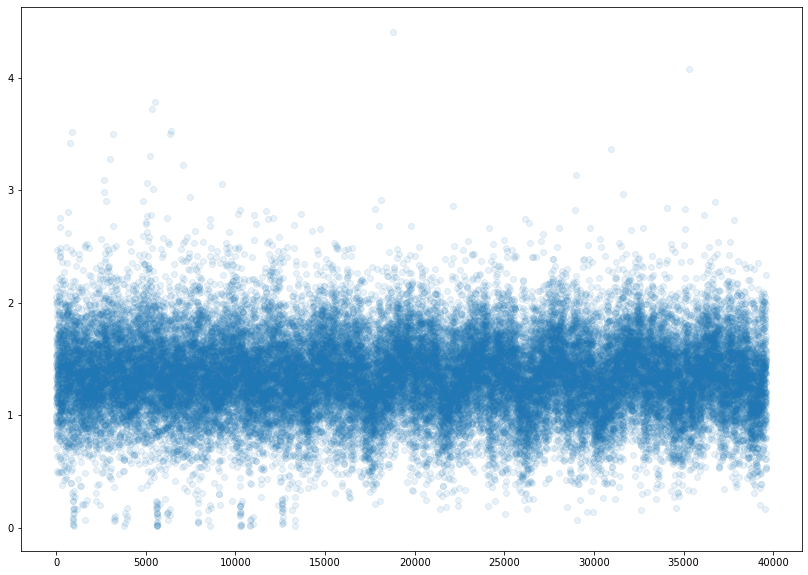

In [265]:
plt.figure(figsize=(14, 10))
plt.scatter(y.index, y["Y_01"], alpha=0.1)

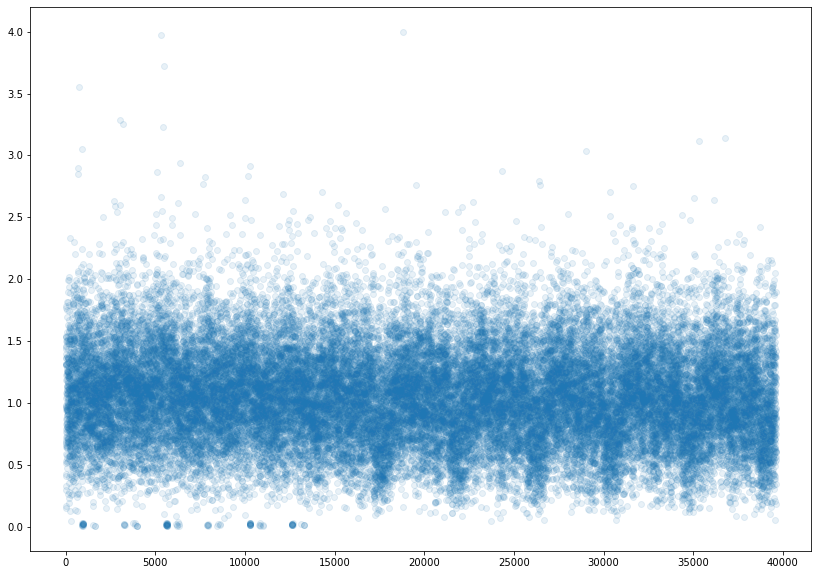

In [266]:
plt.figure(figsize=(14, 10))
plt.scatter(y.index, y["Y_02"], alpha=0.1)

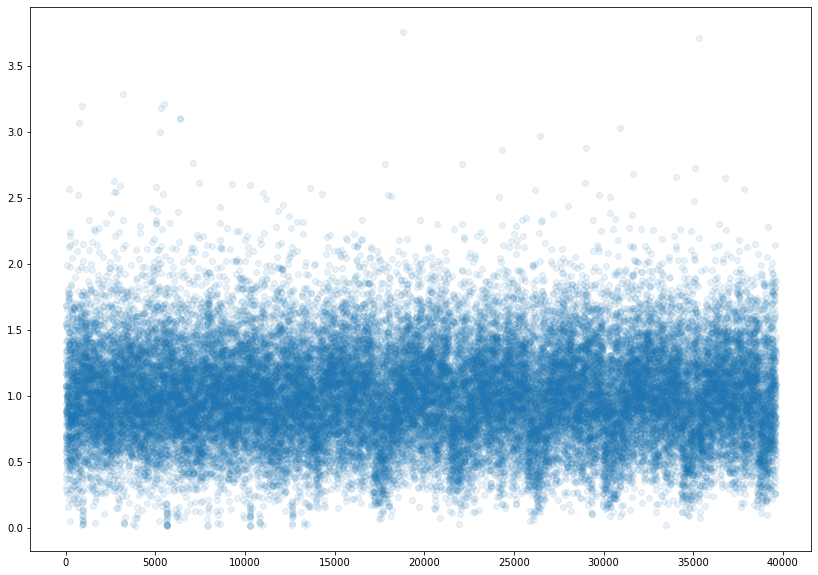

In [267]:
plt.figure(figsize=(14, 10))
plt.scatter(y.index, y["Y_03"], alpha=0.1)

<AxesSubplot:>

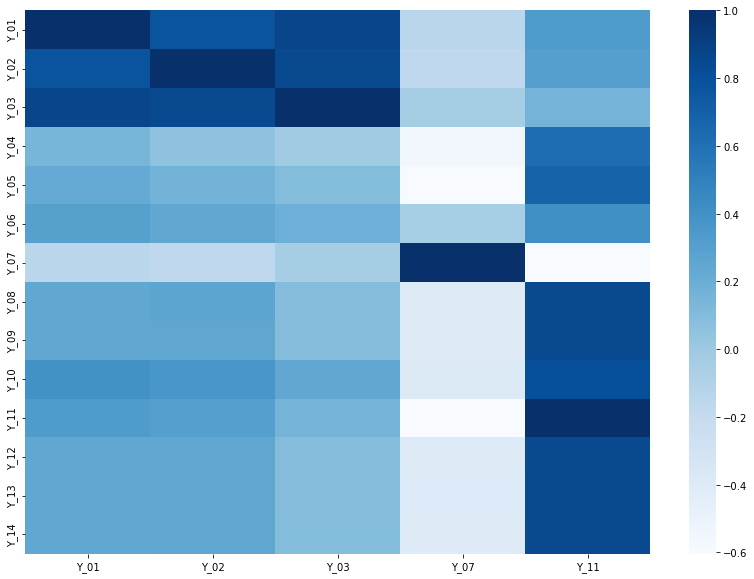

In [278]:
plt.figure(figsize=(14, 10))
sns.heatmap(train.corr()[["Y_01", "Y_02", "Y_03", "Y_07", "Y_11"]].iloc[56:], cmap=plt.cm.Blues)